In [310]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
import seaborn as sns

In [311]:
def step_function(sum):
    if sum >= 0:
        return 1
    else:
        return 0

In [312]:
class Perceptron:
    def __init__(self, input_dimension, train_set_size, epochs, learning_rate = 0.01):
        self.train_set_size = train_set_size
        self.weights = np.random.rand(input_dimension + 1)
        self.epochs = epochs
        self.learning_rate = learning_rate
        self.error = [0]*epochs
        self.dim = input_dimension

    def predict(self, input):
        input_with_bias = np.insert(input,0,1)
        weighted_sum = np.dot(self.weights, input_with_bias)
        activation = step_function(weighted_sum)
        return activation

    def train(self, training_set, true_labels):
        
        plt.ion()
        fig, ax = plt.subplots()

        x_val = np.arange(start=-3, stop= 3)
        temp_data = training_set[0 == true_labels]
        ax.scatter(temp_data[:,0], temp_data[:,1], color = 'blue', marker='.')
        
        temp_data = training_set[1 == true_labels]
        ax.scatter(temp_data[:,0], temp_data[:,1], color = 'red', marker='.')
        
        line1, = ax.plot(x_val, x_val, color = 'green')


        for i in range(self.epochs):
            error = 0
            
            for input, label in zip(training_set, true_labels):
                predictor = self.predict(input)
                input_with_bias = np.insert(input,0,1) #adding element 1 to the input vector at the beginning
                
                error += (label-predictor)**2
                
                print('For Epoch',i, 'error =', error/self.train_set_size)
                self.weights += (label - predictor)*self.learning_rate*input_with_bias
                

                y_val = -((self.weights[0] + self.weights[1]*x_val)/self.weights[2])
                line1.set_ydata(y_val)
                fig.canvas.draw()
                fig.canvas.flush_events()
            error /= self.train_set_size
            self.error[i] = error/2
        plt.ioff()
        plt.clf()
        return self.weights

In [313]:
def ConfusionMatrix(predicted_labels, test_labels):
    mat = np.array([[0,0],[0,0]])
    for i,j in zip(test_labels,predicted_labels):
        if i == j:
                mat[i][i] += 1
        elif i != j:
                mat[i][j] += 1
    sns.heatmap(mat, annot=True,fmt='', cmap='Reds')
    plt.title("Confusion Matrix", fontsize=20)
    plt.xlabel("Predicted", fontsize=15)
    plt.ylabel("Actual", fontsize=15)
    plt.show()
    return mat

In [314]:
X, y = make_blobs(n_samples=400, centers=2, n_features=2, random_state=1, cluster_std = 1,center_box=(-4,4))

In [315]:
unique, counts = np.unique(y, return_counts=True)
print(dict(zip(unique, counts)))

{0: 200, 1: 200}


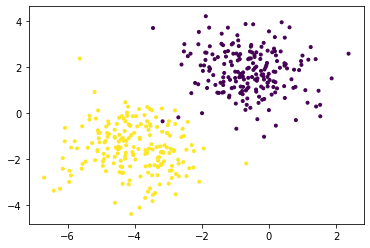

In [316]:
plt.ion()
fig, ax = plt.subplots()

# temp_data = X[0 == y]
# ax.scatter(temp_data[:,0], temp_data[:,1], color = 'blue', marker='.')

# temp_data = X[1 == y]
# ax.scatter(temp_data[:,0], temp_data[:,1], color = 'red', marker='.')

ax.scatter(X[:,0], X[:,1], marker='.', c=y)

In [317]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

binary_classifier = Perceptron(2,len(X_train),epochs=10)

final_weights = binary_classifier.train(X_train, y_train)

For Epoch 0 error = 0.003125
For Epoch 0 error = 0.00625
For Epoch 0 error = 0.009375
For Epoch 0 error = 0.0125
For Epoch 0 error = 0.015625
For Epoch 0 error = 0.01875
For Epoch 0 error = 0.021875
For Epoch 0 error = 0.025
For Epoch 0 error = 0.028125
For Epoch 0 error = 0.028125
For Epoch 0 error = 0.028125
For Epoch 0 error = 0.03125
For Epoch 0 error = 0.034375
For Epoch 0 error = 0.0375
For Epoch 0 error = 0.040625
For Epoch 0 error = 0.040625
For Epoch 0 error = 0.040625
For Epoch 0 error = 0.040625
For Epoch 0 error = 0.04375
For Epoch 0 error = 0.04375
For Epoch 0 error = 0.046875
For Epoch 0 error = 0.046875
For Epoch 0 error = 0.05
For Epoch 0 error = 0.05
For Epoch 0 error = 0.053125
For Epoch 0 error = 0.05625
For Epoch 0 error = 0.059375
For Epoch 0 error = 0.059375
For Epoch 0 error = 0.059375
For Epoch 0 error = 0.059375
For Epoch 0 error = 0.059375
For Epoch 0 error = 0.0625
For Epoch 0 error = 0.0625
For Epoch 0 error = 0.0625
For Epoch 0 error = 0.065625
For Epoch 0 

<Figure size 432x288 with 0 Axes>

In [318]:
print("Final weights: ", final_weights)

Final weights:  [-0.10902133 -0.06775122 -0.07480491]


In [319]:
train_error = binary_classifier.error

predicted_labels = []

for i in X_test:
    predicted_labels.append(binary_classifier.predict(i))

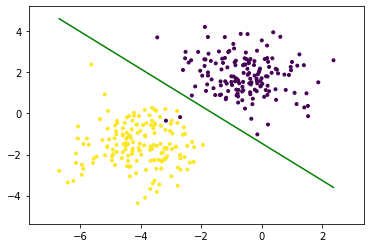

In [320]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.scatter(X_train[:,0], X_train[:,1], marker='.', c=y_train)

x0_1 = np.amin(X_train[:,0])
x0_2 = np.amax(X_train[:,0])

x1_1 = (-final_weights[1]*x0_1 - final_weights[0])/final_weights[2]
x1_2 = (-final_weights[1]*x0_2 - final_weights[0])/final_weights[2]

ax.plot([x0_1, x0_2], [x1_1, x1_2], color='green')

ymin = np.amin(X_train[:,1])
ymax = np.amax(X_train[:,1])

ax.set_xlim([x0_1-1, x0_2+1])
ax.set_ylim([ymin-1, ymax+1])
plt.show()

In [321]:
correct_classification = 0
for i,j in zip(y_test,predicted_labels):
    if i == j:
        correct_classification+=1

accuracy = correct_classification/len(predicted_labels)
print('Accuracy: ',accuracy)

Accuracy:  0.975


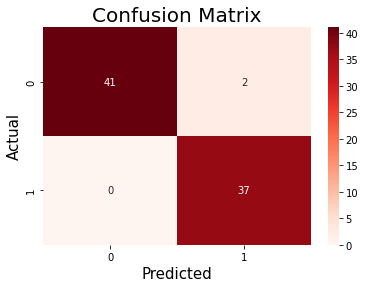

Accuracy:  0.975
Precision:  1.0
Recall:  0.9534883720930233
Specificity:  1.0
f1_score:  0.9761904761904763


In [322]:
cf_mat = ConfusionMatrix(predicted_labels, y_test)

accuracy = (cf_mat[0,0] + cf_mat[1,1]) / (cf_mat[0,0]+cf_mat[0,1]+cf_mat[1,0]+cf_mat[1,1])
print('Accuracy: ', accuracy)

precision = cf_mat[0,0] / (cf_mat[0,0] + cf_mat[1,0])
print('Precision: ',precision)

recall = cf_mat[0,0] / (cf_mat[0,0] + cf_mat[0,1])
print('Recall: ',recall)

specificity= cf_mat[1,1] / (cf_mat[1,0] + cf_mat[1,1])
print('Specificity: ',specificity)

f1_score = (2 * precision * recall) / (precision + recall)
print('f1_score: ',f1_score)

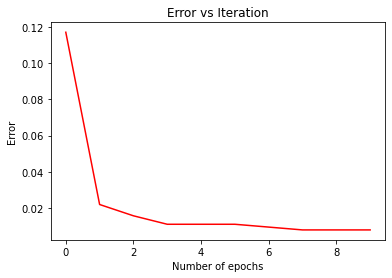

In [323]:
plt.cla()
plt.title("Error vs Iteration")
plt.plot(train_error, color = 'r')
plt.xlabel("Number of epochs")
plt.ylabel("Error")
plt.show(block = True)